In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers

train_data_dir = 'C:\\Users\\my pc\\DL_with_python'
validation_data_dir = 'C:\\Users\\my pc\\DL_with_python'
test_data_dir= 'C:\\Users\\my pc\\DL_with_python'

img_width, img_height = 224, 224
batch_size = 32
epochs = 5

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',  
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')  # for binary classification, adjust for multi-class

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='binary')  # for binary classification, adjust for multi-class

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')  # for binary classification, adjust for multi-class

eval_result = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test loss:", eval_result[0])
print("Test accuracy:", eval_result[1])


Found 78 images belonging to 6 classes.
Found 78 images belonging to 6 classes.
Epoch 1/5
2/2 [==============================] - 77s 57s/step - loss: -62.5940 - accuracy: 0.0000e+00 - val_loss: -245.3423 - val_accuracy: 0.0000e+00
Epoch 2/5
2/2 [==============================] - 63s 43s/step - loss: -279.5979 - accuracy: 0.0000e+00 - val_loss: -499.0015 - val_accuracy: 0.0000e+00
Epoch 3/5
2/2 [==============================] - 60s 51s/step - loss: -592.2541 - accuracy: 0.0000e+00 - val_loss: -767.0923 - val_accuracy: 0.0000e+00
Epoch 4/5
2/2 [==============================] - 69s 51s/step - loss: -839.7951 - accuracy: 0.0000e+00 - val_loss: -1054.2734 - val_accuracy: 0.0000e+00
Epoch 5/5
2/2 [==============================] - 71s 53s/step - loss: -1124.5409 - accuracy: 0.0000e+00 - val_loss: -1350.4180 - val_accuracy: 0.0000e+00
Found 78 images belonging to 6 classes.
2/2 [==============================] - 35s 17s/step - loss: -1358.1797 - accuracy: 0.0000e+00
Test loss: -1358.1796875

In [5]:
from glob import glob


folders=glob('C:\\Users\\my pc\\DL_with_python')



In [6]:
len(folders)


1

In [14]:
from keras.layers import Input,Lambda,Dense,Flatten

#Our layers - you can add more layer if you want
x=Flatten()(resnet50.output)
#Defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)

In [16]:
from keras.applications.resnet50 import ResNet50



IMAGE_SIZE=[224,224]
resnet50=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)




In [23]:
model.save('Restnet50_dog_cat_classify.keras')


In [24]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


# 2 question

In [16]:
from tensorflow.keras.applications import InceptionV3, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

num_classes = 2
input_size = (299, 299)  # InceptionV3 input size

# Load the InceptionV3 or MobileNet model trained on ImageNet data
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(input_size[0], input_size[1], 3))
# base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(input_size[0], input_size[1], 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
  # 'num_classes' should be the number of classes in your dataset

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation for the training set
# No data augmentation for validation and test sets
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# No data augmentation for validation and test sets
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and prepare the data
training_set= train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')  # for binary classification, adjust for multi-class

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='binary')  # for binary classification, adjust for multi-class

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

# Evaluate the model on the test set
test_set = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')  # for binary classification, adjust for multi-class

eval_result = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test loss:", eval_result[0])
print("Test accuracy:", eval_result[1])


Found 78 images belonging to 6 classes.
Found 78 images belonging to 6 classes.
Epoch 1/5


C:\Users\my pc\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 26s 13s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
2/2 [==============================] - 12s 10s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
2/2 [==============================] - 13s 9s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
2/2 [==============================] - 13s 9s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
2/2 [==============================] - 11s 9s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Found 78 images belonging to 6 classes.
2/2 [==============================] - 6s 3s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Test loss: 0.0
Test accuracy: 0.0


In [8]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 22327585 (85.17 MB)
Trainable params: 524801 (2.00 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [10]:
from glob import glob


folders=glob('C:\\Users\\my pc\\DL_with_python')



In [11]:
len(folders)


1

In [17]:
r = model.fit(
 training_set,
 validation_data=test_set,
 epochs=5,
 steps_per_epoch=len(training_set),
 validation_steps=len(test_set)
)

Epoch 1/5
3/3 [==============================] - 17s 6s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 15s 6s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
3/3 [==============================] - 15s 6s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
3/3 [==============================] - 25s 12s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
3/3 [==============================] - 15s 6s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


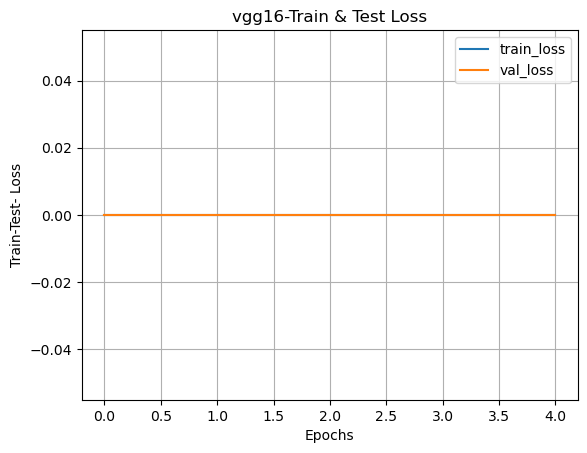

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt


plt.title('vgg16-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16--Loss & Val_loss')

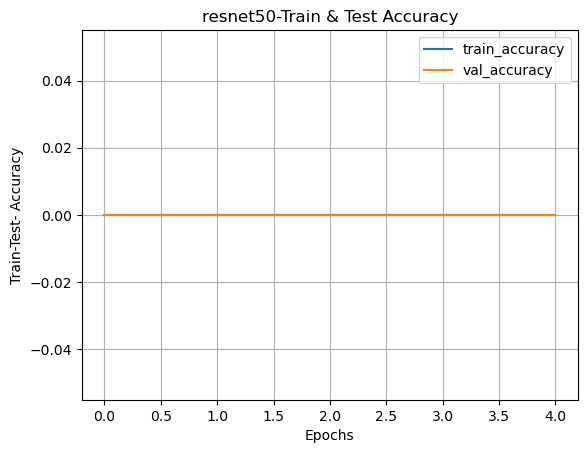

<Figure size 640x480 with 0 Axes>

In [20]:
#Accuracy
plt.title('resnet50-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('resnet50--Accuracy & Val_accuracy')

In [23]:
import numpy as np

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['cat','dog']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))

3/3 [==============================] - 9s 3s/step
Confusion Matrix
[[ 0  0]
 [78  0]]
Classification Report
              precision    recall  f1-score   support

         cat       0.00      0.00      0.00       0.0
         dog       0.00      0.00      0.00      78.0

    accuracy                           0.00      78.0
   macro avg       0.00      0.00      0.00      78.0
weighted avg       0.00      0.00      0.00      78.0

Accuracy Score
0.0


C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\metrics\_cla

<Axes: >

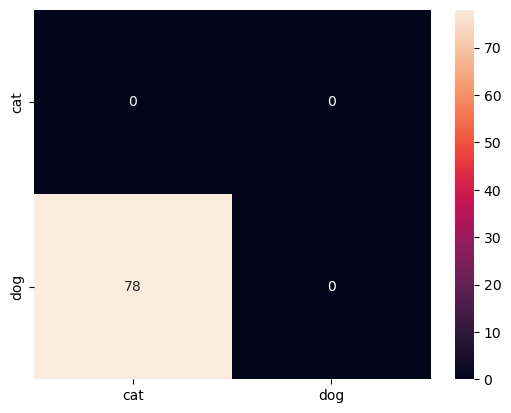

In [24]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['cat','dog'],
 yticklabels=['cat','dog'])